In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)

In [3]:
data

Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86

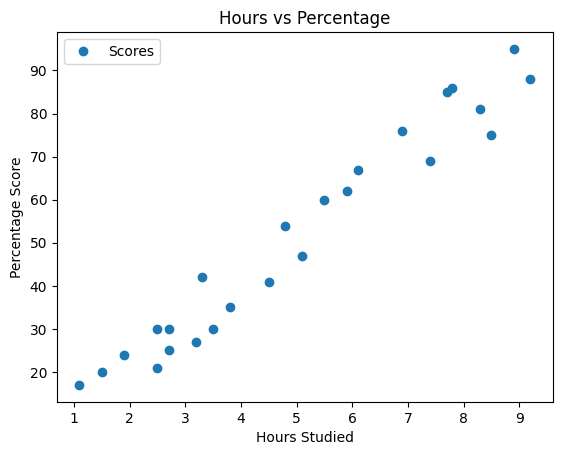

In [5]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [6]:
data.sample(5)

Hours  Scores
2     3.2      27
17    1.9      24
19    7.4      69
3     8.5      75
13    3.3      42

In [9]:
X = data['Hours'].values
y = data['Scores'].values


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
y_pred = model.predict(X_test)


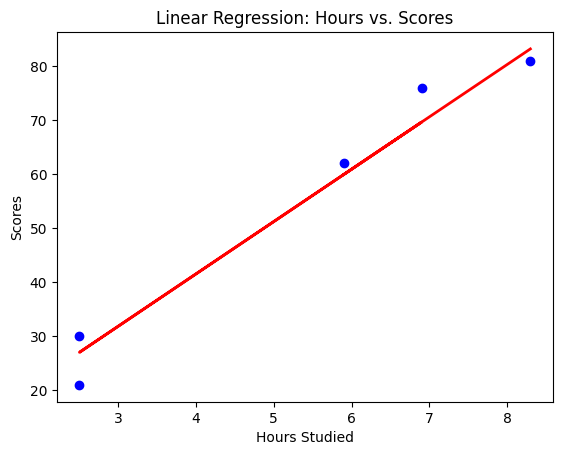

In [17]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title("Linear Regression: Hours vs. Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.show()


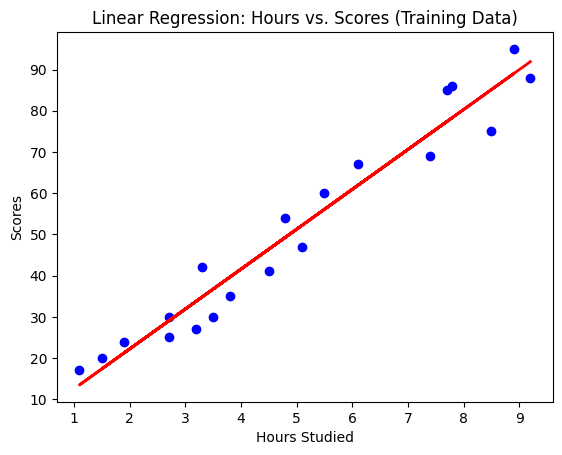

In [19]:
# Predictions on the training data
y_train_pred = model.predict(X_train)

# Visualize the training data and regression line
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_train_pred, color='red', linewidth=2)
plt.title("Linear Regression: Hours vs. Scores (Training Data)")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.show()


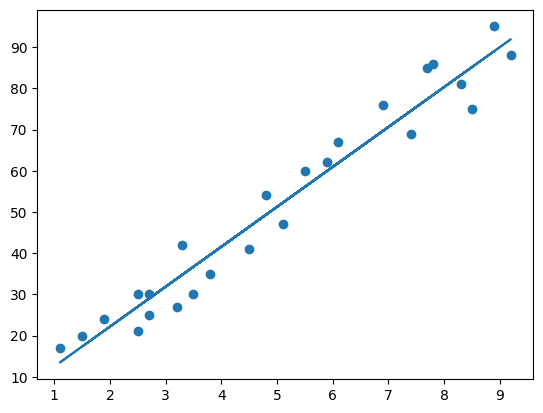

In [21]:
# Plotting the regression line
Linear = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, Linear)
plt.show()

In [22]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153

In [27]:
# You can also test with your own data
hours = 10
own_pred = model.predict([[hours]])
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = 10
Predicted Score = 99.6476738984567


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 18.943211722315272
R-squared: 0.9678055545167994


In [29]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244


In [31]:
# Download model
import joblib

# Save the model to a file
model_filename = 'linear_regression_model.pkl'
joblib.dump(model, model_filename)


['linear_regression_model.pkl']